## Importing libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

## for model building
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.preprocessing import LabelEncoder

## Loading the data

In [2]:
df = pd.read_csv(r"income_data.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [5]:
# df['income'] = df['income'].map({"<=50K": 0,">50K":1})
# df['income'] = [1 if x == ">50K" else 0 for x in df['income']]
df['income'] = df.income.map({'<=50K': 0, '>50K': 1})

In [6]:
df['income'].unique()

array([0, 1], dtype=int64)

In [7]:
df[df['workclass'] == "?"][:5]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,1
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,0
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,0


In [8]:
df.replace("?",np.NAN,inplace = True)

In [9]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [10]:
df['workclass'] = df['workclass'].fillna(method = 'bfill')
df['occupation'] = df['occupation'].fillna(method = 'bfill')
df['native.country'] = df['native.country'].fillna(method = 'pad')

In [11]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [12]:
df.rename(columns= {
    'education.num' : "education_num",
    "marital.status" : "marital_status",
    "capital.gain" : "capital_gain",
    "capital.loss" : "capital_loss",
    "hours.per.week" : "hours_per_week",
    "native.country" : "native_country"
},inplace= True)

In [13]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [14]:
categorical_fea = [col for col in df.columns if df[col].dtype == object]
numerical_fea = [col for col in df.columns if df[col].dtype != object]

In [15]:
categorical_fea

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [16]:
numerical_fea

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'income']

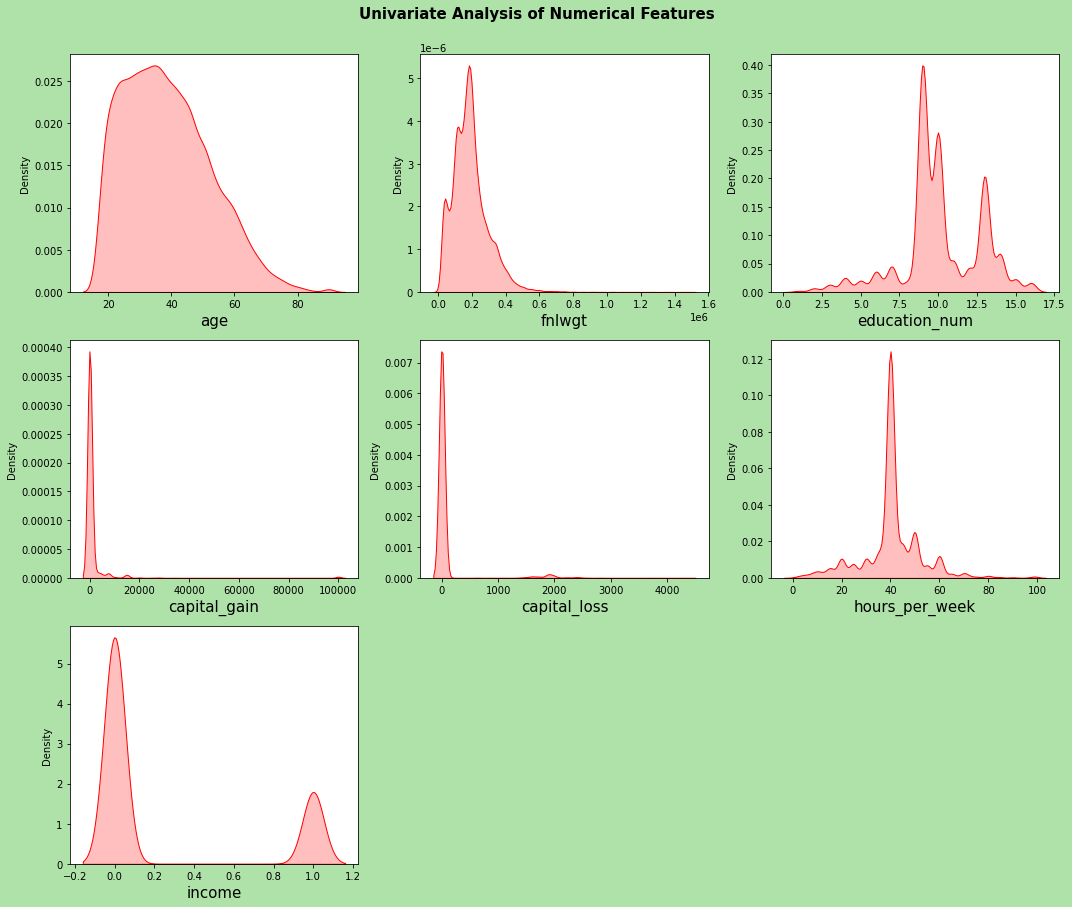

In [70]:
plt.figure(figsize=(15,20), facecolor='#1a05')
plt.suptitle('Univariate Analysis of Numerical Features',fontweight = "bold",fontsize=15,y = 1)
for i in range(0, len(numerical_fea)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_fea[i]],shade = True, color='r',data=df) 
    plt.xlabel(numerical_fea[i],fontsize = 15)
    plt.tight_layout()

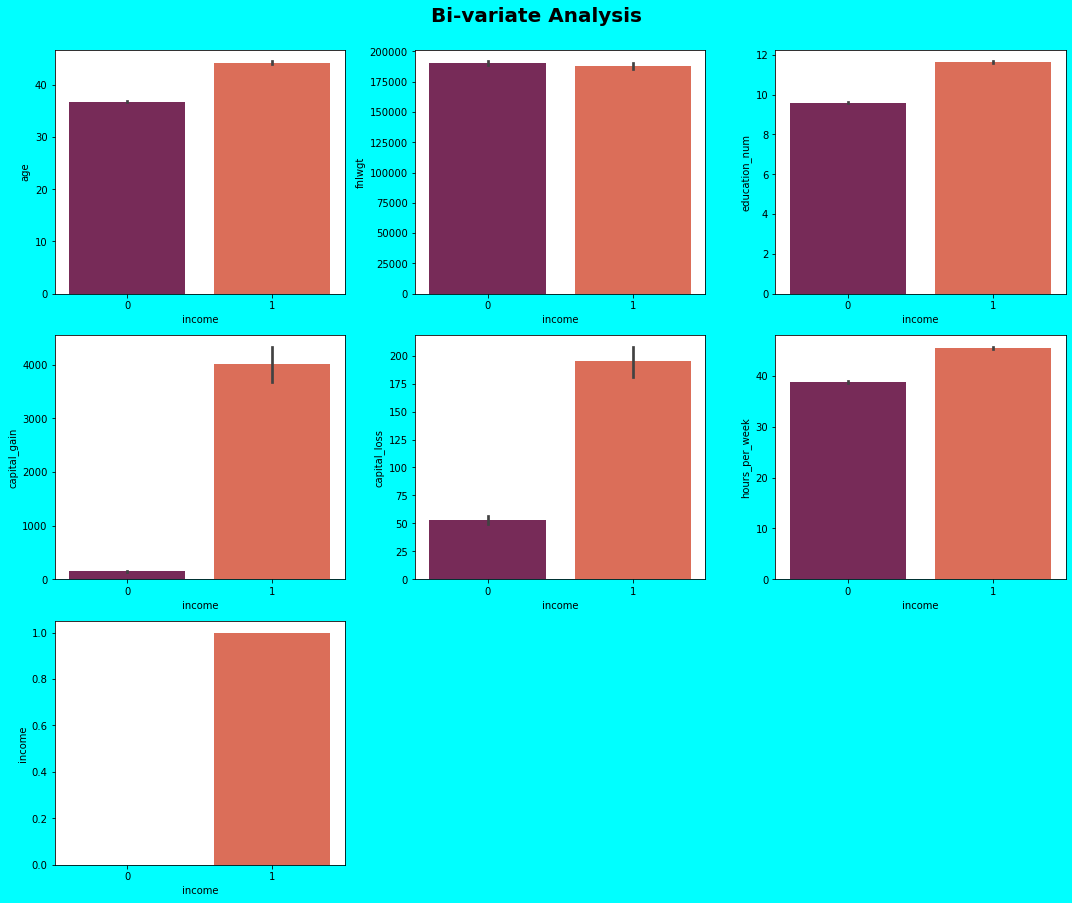

In [71]:
plt.figure(figsize=(15,20), facecolor='cyan')
plt.suptitle('Bi-variate Analysis', fontsize=20, fontweight='bold', alpha=1, y=1)
for i in range(0, len(numerical_fea)):
    plt.subplot(5, 3, i+1) 
    sns.barplot(y=numerical_fea [i], x='income', data = df,palette ="rocket") 
    plt.tight_layout()

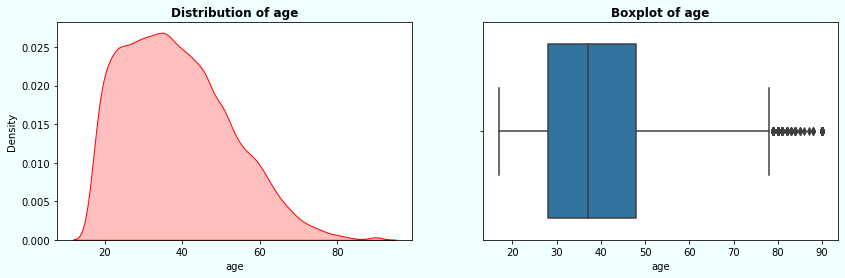

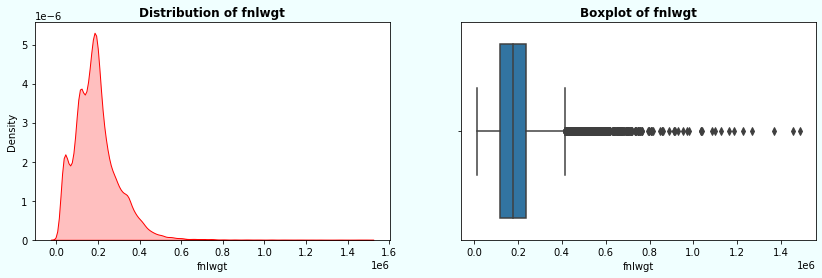

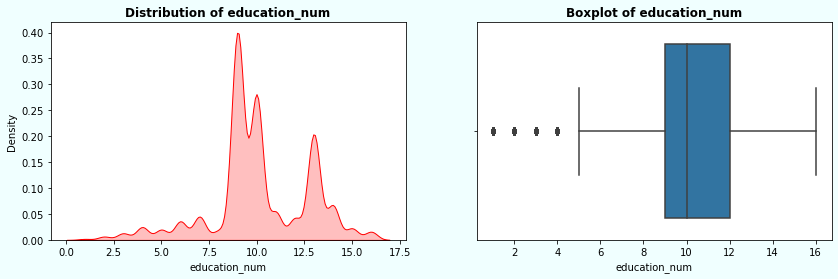

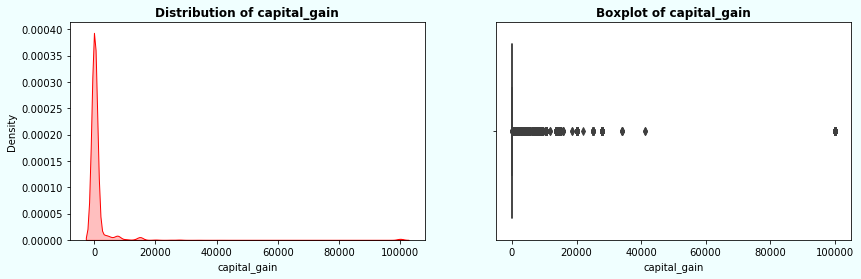

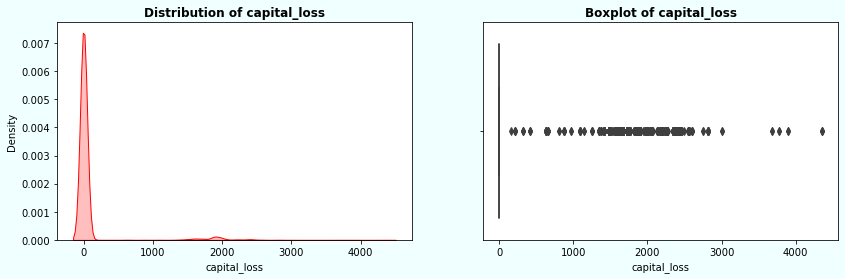

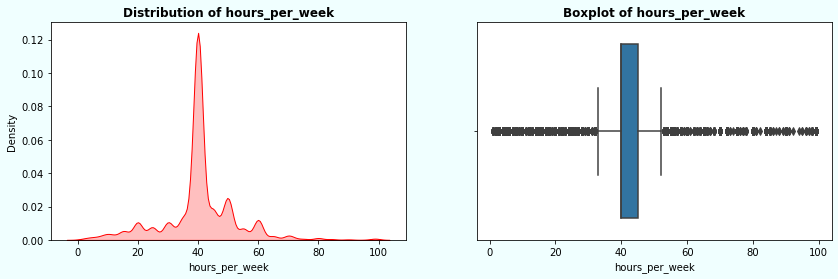

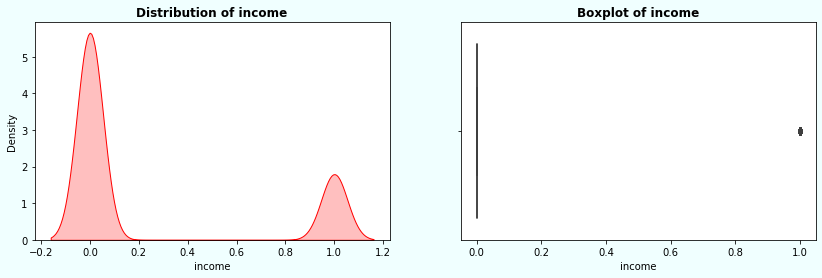

In [72]:
for fea in numerical_fea:
    plt.figure(figsize = (14,4), facecolor='azure')
    plt.subplot(121)
    sns.kdeplot(x=df[fea],shade = True, color='r',data=df) 
    plt.title("Distribution of {}".format(fea),fontweight = 'bold' )
    
    plt.subplot(122)
    sns.boxplot(x= fea,data = df[numerical_fea]) 
    plt.title("Boxplot of {}".format(fea),fontweight = 'bold' )
    plt.show()

## Handling Outliers

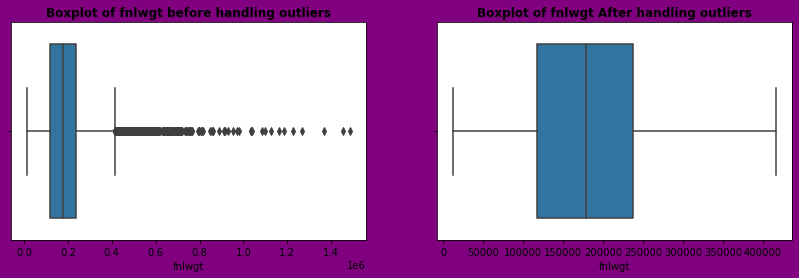

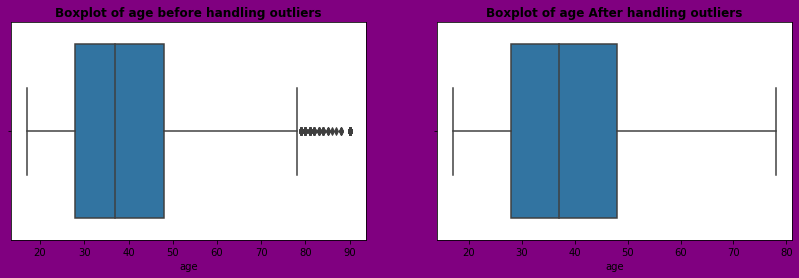

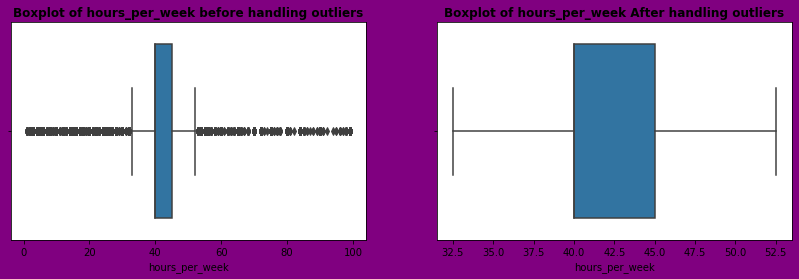

In [73]:
df1 = df.copy()
feature_to_use = ["fnlwgt",'age','hours_per_week']

for i in range(len(feature_to_use)):
    IQR = df1[feature_to_use[i]].quantile(0.75) - df1[feature_to_use[i]].quantile(0.25)
    Lower_Limit = df1[feature_to_use[i]].quantile(0.25) - (1.5*IQR)
    UPPER_LIMIT = df1[feature_to_use[i]].quantile(0.75) + (1.5*IQR)
    df1[feature_to_use[i]]= np.where(df1[feature_to_use[i]]>UPPER_LIMIT,UPPER_LIMIT,
                                np.where(df1[feature_to_use[i]]<Lower_Limit,Lower_Limit,df1[feature_to_use[i]]))


for fea in feature_to_use:
    plt.figure(figsize = (14,4), facecolor='purple')
    plt.subplot(121)
    sns.boxplot(x = fea, data = df)
    plt.title("Boxplot of {} before handling outliers".format(fea),fontweight = 'bold')

    plt.subplot(122)
    sns.boxplot(x = fea, data = df1)
    plt.title("Boxplot of {} After handling outliers".format(fea),fontweight = 'bold')
    plt.show()

In [21]:
# Saperate dependent and independent variables
x = df1.drop('income', axis = 1)
y = df1['income']

In [23]:
x.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,78.0,Private,77053.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40.0,United-States
1,78.0,Private,132870.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,32.5,United-States
2,66.0,Private,186061.0,Some-college,10,Widowed,Machine-op-inspct,Unmarried,Black,Female,0,4356,40.0,United-States
3,54.0,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40.0,United-States
4,41.0,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40.0,United-States


In [24]:
x.shape, y.shape

((32561, 14), (32561,))

## Label Encoding

In [26]:
labelencoder_x = LabelEncoder()
x[categorical_fea] = x[categorical_fea].apply(LabelEncoder().fit_transform)

In [27]:
x.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,78.0,3,77053.0,11,9,6,3,1,4,0,0,4356,40.0,38
1,78.0,3,132870.0,11,9,6,3,1,4,0,0,4356,32.5,38
2,66.0,3,186061.0,15,10,6,6,4,2,0,0,4356,40.0,38
3,54.0,3,140359.0,5,4,0,6,4,4,0,0,3900,40.0,38
4,41.0,3,264663.0,15,10,5,9,3,4,0,0,3900,40.0,38


In [28]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

## Train Test Split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=10)
x_train.shape, y_train.shape

((21815, 14), (21815,))

In [30]:
x_test.shape, y_test.shape

((10746, 14), (10746,))

# Model Building

## Decision Tree

In [34]:
model_report = []

In [31]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.810068862832682

In [32]:
DT_prediction = model.predict(x_test)

In [33]:
accuracy = accuracy_score(y_test,DT_prediction)

In [36]:
model_report.append(['Decision Tree',accuracy] )
accuracy

0.810068862832682

## Hyperparameter Tunning with GridSearchCV

In [37]:
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth': range(2,32,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter':['best','random']
}

In [38]:
dt_grid=GridSearchCV(estimator=model, param_grid= grid_param, cv = 3, n_jobs = -1)

In [39]:
dt_grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [41]:
dt_grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 9,
 'min_samples_split': 7,
 'splitter': 'best'}

In [42]:
dt_best_para = DecisionTreeClassifier(criterion = "entropy",
                                      max_depth= 8 , 
                                      min_samples_leaf= 3,
                                      min_samples_split= 2 ,
                                      splitter= "best")

In [43]:
dt_best_para.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3)

In [44]:
dt_best_para_pred2 = dt_best_para.predict(x_test)


In [46]:
print("Accuracy Before Hyper-parameter tunning:",accuracy_score(y_test,DT_prediction))
print("Accuracy after Hyper-parameter tunning:",accuracy_score(y_test,dt_best_para_pred2))

Accuracy Before Hyper-parameter tunning: 0.810068862832682
Accuracy after Hyper-parameter tunning: 0.8535268937278988


In [47]:
hd_acc = accuracy_score(y_test,dt_best_para_pred2)
model_report.append(['Decision Tree Hyperparameter tunned',hd_acc])

## Random Forest Classifier

In [48]:
RF_model = RandomForestClassifier()
RF_model.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
y_pred_rf = RF_model.predict(x_test)
rf_acc = accuracy_score(y_test,y_pred_rf)
model_report.append(['Random Forest',rf_acc])
accuracy_score(y_test,y_pred_rf)

0.8548297040759353

## Hyperparameter Tunning with RandomizedSearchCV

In [52]:
Ran_param = {
    "max_depth" : [5,8,15,None,10],
    'max_features' : [3,'auto'],
    'min_samples_split' : [2,8,15,20],
    'n_estimators' : [50,100,200,500]
}

In [54]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator = RandomForestClassifier(),
                   param_distributions = Ran_param,
                   n_iter= 100,
                   cv = 3,
                   verbose = 2,
                   n_jobs=-1)

In [55]:
random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'max_features': [3, 'auto'],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [50, 100, 200, 500]},
                   verbose=2)

In [56]:
random.best_params_,random.best_estimator_

({'n_estimators': 200,
  'min_samples_split': 8,
  'max_features': 3,
  'max_depth': 15},
 RandomForestClassifier(max_depth=15, max_features=3, min_samples_split=8,
                        n_estimators=200))

In [57]:
random.best_params =  RandomForestClassifier(max_depth= None, max_features=3 , min_samples_split=15,
                        n_estimators=50)
random.best_params.fit(x_train,y_train)
y_pred_rf_bestpara = random.best_params.predict(x_test)

In [59]:
print("Accuracy Before Hyper-parameter tunning:",accuracy_score(y_test,DT_prediction))
print("Accuracy after Hyper-parameter tunning:",accuracy_score(y_test,dt_best_para_pred2))

Accuracy Before Hyper-parameter tunning: 0.810068862832682
Accuracy after Hyper-parameter tunning: 0.8535268937278988


In [60]:
hd_acc = accuracy_score(y_test,y_pred_rf_bestpara)
model_report.append(['Random Forest Hypertunned',hd_acc])
accuracy_score(y_test,y_pred_rf_bestpara)

0.8624604504001488

## Bagging Classifier using SVC 

In [61]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

model_bag_svc = BaggingClassifier(base_estimator=SVC(), n_estimators = 50, random_state=0)

In [62]:
model_bag_svc.fit(x_train,y_train)

BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=0)

In [64]:
y_pred_bag = model_bag_svc.predict(x_test)
bg_acc = accuracy_score(y_test, y_pred_bag)
model_report.append(['Bagging Classifier using SVC',bg_acc])
accuracy_score(y_test, y_pred_bag)

0.7949934859482598

In [65]:
model_report

[['Decision Tree', 0.810068862832682],
 ['Decision Tree Hyperparameter tunned', 0.8535268937278988],
 ['Random Forest', 0.8548297040759353],
 ['Random Forest Hypertunned', 0.8624604504001488],
 ['Bagging Classifier using SVC', 0.7949934859482598]]

In [66]:
report = pd.DataFrame(model_report, columns = ['Classifier','Accuracy'])
report.sort_values(by = "Accuracy",ascending = False)

,Classifier,Accuracy
3,Random Forest Hypertunned,0.862460
2,Random Forest,0.854830
1,Decision Tree Hyperparameter tunned,0.853527
0,Decision Tree,0.810069
4,Bagging Classifier using SVC,0.794993


## Store the Best model in a pickle file

In [67]:
#Random Forest Hypertunned
import pickle
pickle.dump(y_pred_rf_bestpara, open('randomforest_hupertuned.sav','wb'))